# Final Project Group 7

# Authors: Leroy Musa, Chan Woo Hwang, Gordon Hamilton, Joaquin Philco

**Original Dataset Source: House Prices 2023 Dataset. gigasheet. https://www.gigasheet.com/sample-data/house-prices-2023-dataset**


**Modified Dataset: Student Performance https://raw.githubusercontent.com/leroymusa/EECS3401-Final-Project/main/house_prices.csv**


# Acquiring Dataset

In [1]:
# Import libraries
# you can install missing library using pip install numpy 
import sklearn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore', category=DeprecationWarning)
warnings.filterwarnings('ignore', category=FutureWarning)


# Download the dataset
url = "https://raw.githubusercontent.com/leroymusa/EECS3401-Final-Project/main/house_prices.csv"
housing_prices = pd.read_csv(url, sep=',')

# Let's create a backup copy of the dataset
housing_backup = housing_prices

In [2]:
#Show the first 5 values of the dataset before dropping and cleaning it

housing_prices.head() 
#housing_prices.info()

,Unnamed: 0,property_type,price,location,city,baths,purpose,bedrooms,Area_in_Marla
0,0,Flat,10000000,G-10,Islamabad,2,For Sale,2,4.0
1,1,Flat,6900000,E-11,Islamabad,3,For Sale,3,5.6
2,2,House,16500000,G-15,Islamabad,6,For Sale,5,8.0
3,3,House,43500000,Bani Gala,Islamabad,4,For Sale,4,40.0
4,4,House,7000000,DHA Defence,Islamabad,3,For Sale,3,8.0


## Cleaning Dataset


In [3]:
#Cleaning Data

housing_prices = housing_prices.drop('Unnamed: 0', axis=1)
housing_prices.isna().sum() #checks for missing values and returns the individual sum of these ones for each

#Checking for zero values in the data set

print("Number of zeros in the price column:", (housing_prices['price'] == 0).sum())
print("Number of zeros in the baths column:", (housing_prices['baths'] == 0).sum())
print("Number of zeros in the bedrooms column:", (housing_prices['bedrooms'] == 0).sum())
print("Number of zeros in the Area in Marla column:", (housing_prices['Area_in_Marla'] == 0.0).sum())

#show the columns with zeros
zero_rows = housing_prices[housing_prices['bedrooms'] == 0]
print(zero_rows)
zero_rows = housing_prices[housing_prices['Area_in_Marla'] == 0]
print(zero_rows)

#We cannot keep values that have zeros as bedrooms or Area as having a house with 0 bedrooms and 0.0 area does not make sense.
housing_prices = housing_prices[housing_prices['bedrooms'] != 0]
housing_prices = housing_prices[housing_prices['Area_in_Marla'] != 0]

#Double check for zeros again
print("Number of zeros in the price column:", (housing_prices['price'] == 0).sum())
print("Number of zeros in the baths column:", (housing_prices['baths'] == 0).sum())
print("Number of zeros in the bedrooms column:", (housing_prices['bedrooms'] == 0).sum())
print("Number of zeros in the Area in Marla column:", (housing_prices['Area_in_Marla'] == 0.0).sum())

Number of zeros in the price column: 0
Number of zeros in the baths column: 0
Number of zeros in the bedrooms column: 294
Number of zeros in the Area in Marla column: 10
      property_type     price                        location        city  \
230            Flat   6000000             Bahria Town Karachi     Karachi   
341            Flat   5049000                       Scheme 33     Karachi   
369            Flat     75000                             I-8   Islamabad   
1042          House   8500000  Gulzar-e-Quaid Housing Society  Rawalpindi   
1430          House  23000000          Bahria Town Rawalpindi  Rawalpindi   
...             ...       ...                             ...         ...   
93977          Flat   1350000                     DHA Defence      Lahore   
96777          Flat   3500000                       Nazimabad     Karachi   
98223          Flat     65000                            F-11   Islamabad   
98487          Flat   3800000                     Saddar Tow

In [4]:
#Show the dataset after cleaning data
housing_prices.head() 

,property_type,price,location,city,baths,purpose,bedrooms,Area_in_Marla
0,Flat,10000000,G-10,Islamabad,2,For Sale,2,4.0
1,Flat,6900000,E-11,Islamabad,3,For Sale,3,5.6
2,House,16500000,G-15,Islamabad,6,For Sale,5,8.0
3,House,43500000,Bani Gala,Islamabad,4,For Sale,4,40.0
4,House,7000000,DHA Defence,Islamabad,3,For Sale,3,8.0


## Exploratory Data Analysis of the Dataset

### EDAs for Non-Vumerical Variables

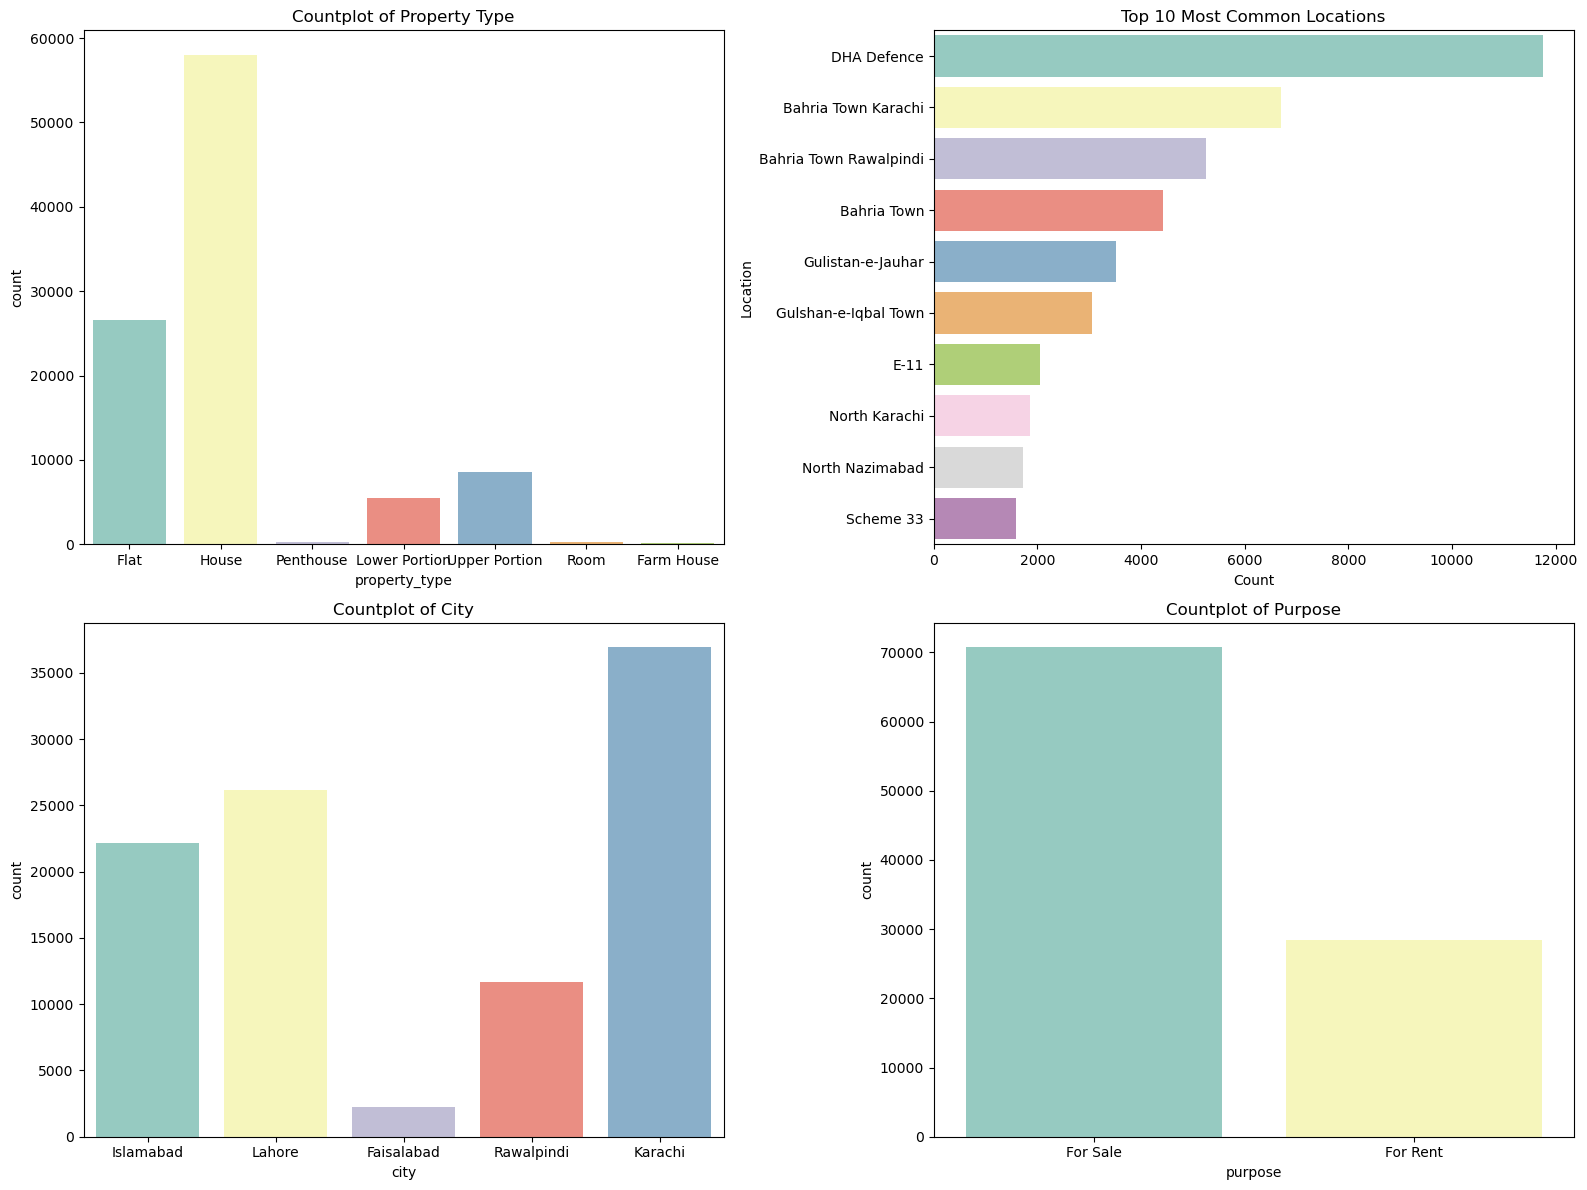

In [5]:
#housing_prices.hist(bins=20, figsize=(24, 16))

# Set up the figure and axes
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Property Type Count Plot
sns.countplot(x='property_type', data=housing_prices, palette='Set3', ax=axes[0, 0])
axes[0, 0].set_title('Countplot of Property Type')

# Location Count Plot
location_counts = housing_prices['location'].value_counts().head(10)
sns.barplot(x=location_counts.values, y=location_counts.index, palette='Set3', ax=axes[0, 1])
axes[0, 1].set_title('Top 10 Most Common Locations')
axes[0, 1].set_xlabel('Count')
axes[0, 1].set_ylabel('Location')

# City Count Plot
sns.countplot(x='city', data=housing_prices, palette='Set3', ax=axes[1, 0])
axes[1, 0].set_title('Countplot of City')

# Purpose Count Plot
sns.countplot(x='purpose', data=housing_prices, palette='Set3', ax=axes[1, 1])
axes[1, 1].set_title('Countplot of Purpose')

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

### EDAs for Numerical Variables

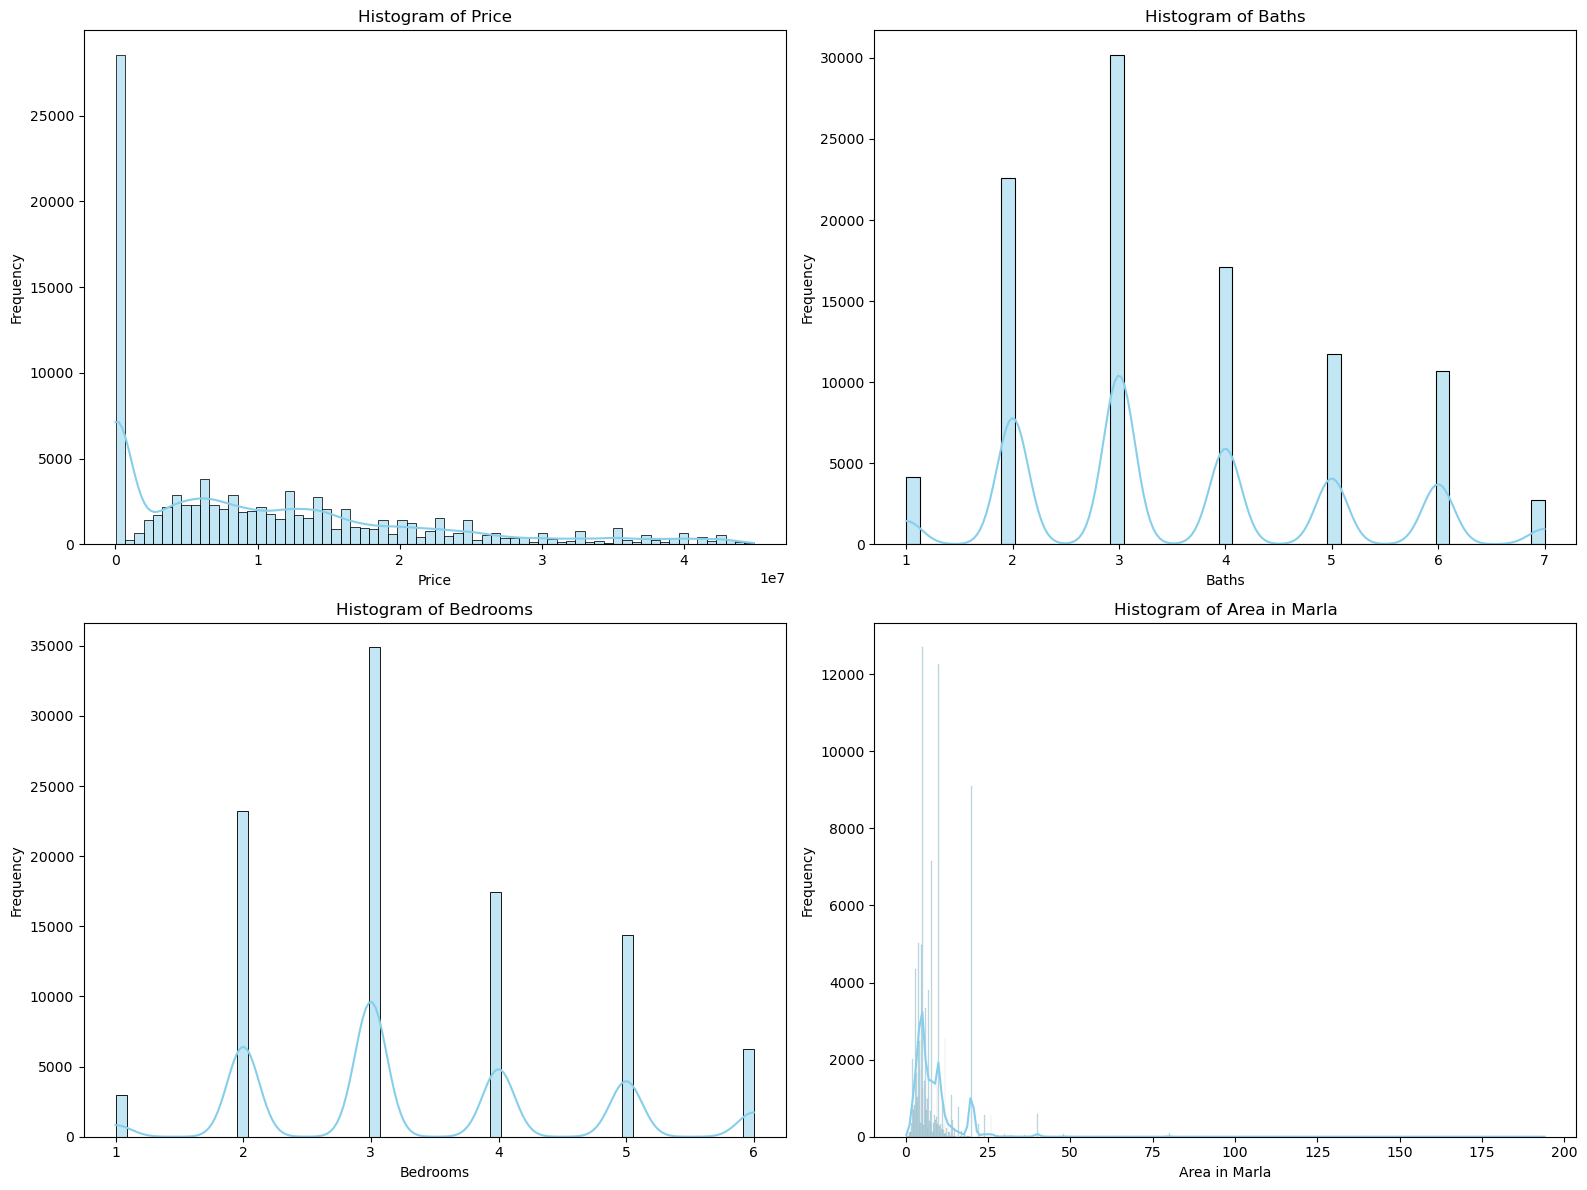

<Figure size 2000x800 with 0 Axes>

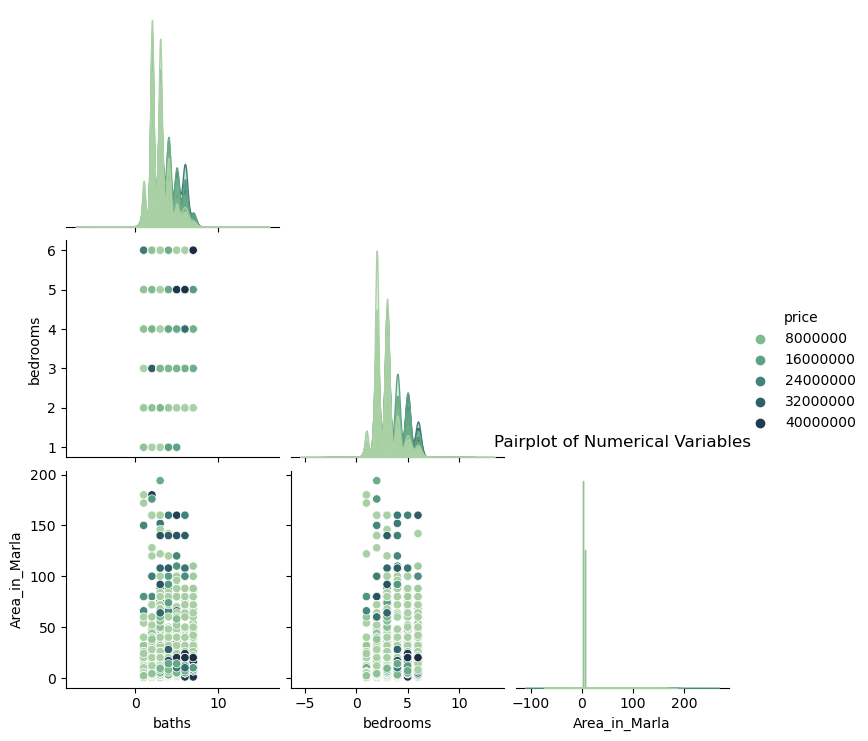

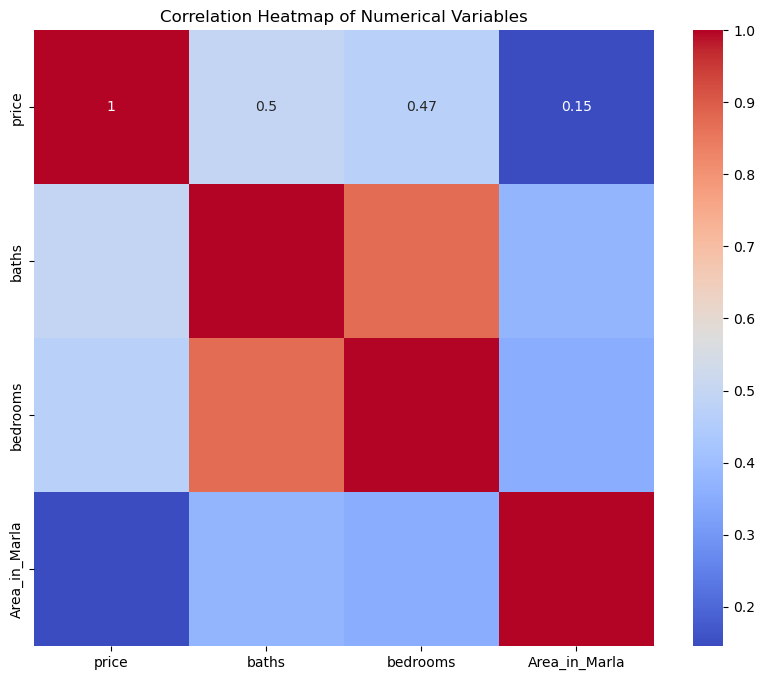

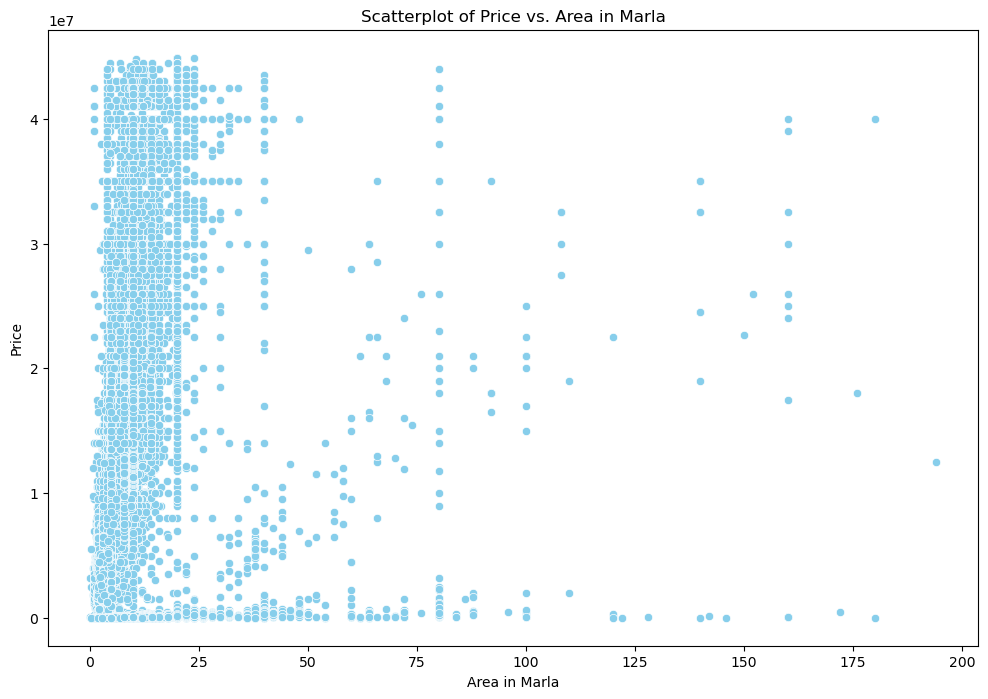

In [26]:
# Set up the figure and axes
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Histogram of Price
sns.histplot(data=housing_prices, x='price', kde=True, color='skyblue', ax=axes[0, 0])
axes[0, 0].set_title('Histogram of Price')
axes[0, 0].set_xlabel('Price')
axes[0, 0].set_ylabel('Frequency')

# Histogram of Baths
sns.histplot(data=housing_prices, x='baths', kde=True, color='skyblue', ax=axes[0, 1])
axes[0, 1].set_title('Histogram of Baths')
axes[0, 1].set_xlabel('Baths')
axes[0, 1].set_ylabel('Frequency')

# Histogram of Bedrooms
sns.histplot(data=housing_prices, x='bedrooms', kde=True, color='skyblue', ax=axes[1, 0])
axes[1, 0].set_title('Histogram of Bedrooms')
axes[1, 0].set_xlabel('Bedrooms')
axes[1, 0].set_ylabel('Frequency')

# Histogram of Area in Marla
sns.histplot(data=housing_prices, x='Area_in_Marla', kde=True, color='skyblue', ax=axes[1, 1])
axes[1, 1].set_title('Histogram of Area in Marla')
axes[1, 1].set_xlabel('Area in Marla')
axes[1, 1].set_ylabel('Frequency')

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

# Pairplot
plt.figure(figsize=(20, 8))
sns.pairplot(data=housing_prices[['price', 'baths', 'bedrooms', 'Area_in_Marla']], hue="price", corner=True, dropna=True, palette="ch:r=-.5,l=.75")
plt.title('Pairplot of Numerical Variables')
plt.show()

# Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(housing_prices[['price', 'baths', 'bedrooms', 'Area_in_Marla']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap of Numerical Variables')
plt.show()

# Scatterplot
plt.figure(figsize=(12, 8))
sns.scatterplot(data=housing_prices, x='Area_in_Marla', y='price', color='skyblue')
plt.title('Scatterplot of Price vs. Area in Marla')
plt.xlabel('Area in Marla')
plt.ylabel('Price')
plt.show()


# Scatterplot
plt.figure(figsize=(12, 8))
sns.scatterplot(data=housing_prices, x='bedrooms', y='price', color='skyblue')
plt.title('Scatterplot of Price vs. bedrooms')
plt.xlabel('bedrooms')
plt.ylabel('Price')
plt.show()

# Scatterplot
plt.figure(figsize=(12, 8))
sns.scatterplot(data=housing_prices, x='baths', y='price', color='skyblue')
plt.title('Scatterplot of Price vs. baths')
plt.xlabel('baths')
plt.ylabel('Price')
plt.show()



In [8]:
#corr_matrix["bedrooms"].sort_values(ascending=False)

In [9]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

housing_prices.drop(labels=['location'], axis = 1, inplace = True)

num_cols = housing_prices.select_dtypes(include='number').columns.to_list()
cat_cols = housing_prices.select_dtypes(exclude='number').columns.to_list()

#create pipelines for numeric and categorical columns

num_pipeline = make_pipeline(SimpleImputer(strategy = 'mean'), StandardScaler())
cat_pipeline = make_pipeline(SimpleImputer(strategy='most_frequent'), OneHotEncoder())


#use ColumnTransformer to set the estimators and transformations

preprocessing = ColumnTransformer([('num', num_pipeline, num_cols),
                                   ('cat', cat_pipeline, cat_cols)],
                                    remainder='passthrough'
                                 )

preprocessing

ColumnTransformer(remainder='passthrough',
                  transformers=[('num',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer()),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 ['price', 'baths', 'bedrooms',
                                  'Area_in_Marla']),
                                ('cat',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehotencoder',
                                                  OneHotEncoder())]),
                                 ['property_type', 'city', 'purpose'])])

In [10]:
housing_prepared = preprocessing.fit_transform(housing_prices)

# Scikit-learn strips the column headers in most cases, so just add them back on afterward.
feature_names=preprocessing.get_feature_names_out()
housing_prepared = pd.DataFrame(data=housing_prepared, columns=feature_names)

housing_prepared

,num__price,num__baths,num__bedrooms,num__Area_in_Marla,cat__property_type_Farm House,cat__property_type_Flat,cat__property_type_House,cat__property_type_Lower Portion,cat__property_type_Penthouse,cat__property_type_Room,cat__property_type_Upper Portion,cat__city_Faisalabad,cat__city_Islamabad,cat__city_Karachi,cat__city_Lahore,cat__city_Rawalpindi,cat__purpose_For Rent,cat__purpose_For Sale
0,-0.036169,-1.039960,-1.093407,-0.637983,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1,-0.326851,-0.361172,-0.289817,-0.423754,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,0.573325,1.675193,1.317362,-0.102411,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
3,3.105072,0.317616,0.513772,4.182168,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
4,-0.317474,-0.361172,-0.289817,-0.102411,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99190,-0.270590,-0.361172,-0.289817,-0.102411,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
99191,-0.148691,0.317616,-0.289817,-0.102411,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
99192,0.338904,-0.361172,-0.289817,-0.102411,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
99193,0.338904,0.317616,0.513772,0.700948,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


In [11]:
from sklearn.model_selection import train_test_split
X = housing_prepared.drop(["num__price"], axis=1)
y = housing_prepared["num__price"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [12]:
from sklearn.linear_model import LinearRegression

lr_model = LinearRegression()

lr_model.fit(X_train,y_train)


LinearRegression()

In [13]:
# Predict the outcome of test data

lr_y_predict = lr_model.predict(X_test)

from sklearn.metrics import mean_squared_error as mse
lr_mse=mse(y_test, lr_y_predict)
lr_mse

0.3994307932851344

In [14]:
from sklearn.model_selection import cross_val_score, KFold

scores = cross_val_score(lr_model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')

scores

array([-0.40275545, -0.40951163, -0.40234113, -0.39718269, -0.41124799])

In [15]:
print("Mean: {:.3f}\nStd: {:.3f}\nMin: {:.3f}\nMax: {:.3f}".format(
    scores.mean(), scores.std(), scores.min(), scores.max()))

Mean: -0.405
Std: 0.005
Min: -0.411
Max: -0.397
